In [ ]:
!pip install -q monai[all] pydicom opencv-python-headless tqdm scikit-learn torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
 65% 127M/195M [00:00<00:00, 1.33GB/s]
100% 195M/195M [00:00<00:00, 944MB/s] 


In [ ]:
!unzip breast-ultrasound-images-dataset.zip -d busi

Archive:  breast-ultrasound-images-dataset.zip
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: busi/Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating:

In [ ]:
!ls busi

Dataset_BUSI_with_GT


In [ ]:
import os, shutil, random

base = "busi/Dataset_BUSI_with_GT"
classes = ["benign","malignant","normal"]

os.makedirs("dataset/train", exist_ok=True)
os.makedirs("dataset/test", exist_ok=True)

for cls in classes:
    images = os.listdir(os.path.join(base, cls))
    random.shuffle(images)
    split = int(len(images)*0.8)  # 80% train

    train_imgs = images[:split]
    test_imgs  = images[split:]

    os.makedirs(f"dataset/train/{cls}", exist_ok=True)
    os.makedirs(f"dataset/test/{cls}", exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(base, cls, img), f"dataset/train/{cls}/{img}")

    for img in test_imgs:
        shutil.copy(os.path.join(base, cls, img), f"dataset/test/{cls}/{img}")

print("DONE")

DONE


In [ ]:
!ls dataset/train
!ls dataset/test

benign	malignant  normal
benign	malignant  normal


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

# basic transforms
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

# datasets
train_ds = datasets.ImageFolder("dataset/train", transform=transform)
test_ds  = datasets.ImageFolder("dataset/test",  transform=transform)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=16, shuffle=False)

# load resnet18 pretrained
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 3) # 3 classes

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

print("Model ready.")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 124MB/s]


Model ready.


In [ ]:
epochs = 5

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss/len(train_loader):.4f}")

print("Training done")

Epoch 1/5 - Loss: 0.4226
Epoch 2/5 - Loss: 0.1624
Epoch 3/5 - Loss: 0.0730
Epoch 4/5 - Loss: 0.1066
Epoch 5/5 - Loss: 0.0566
Training done


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 92.45%


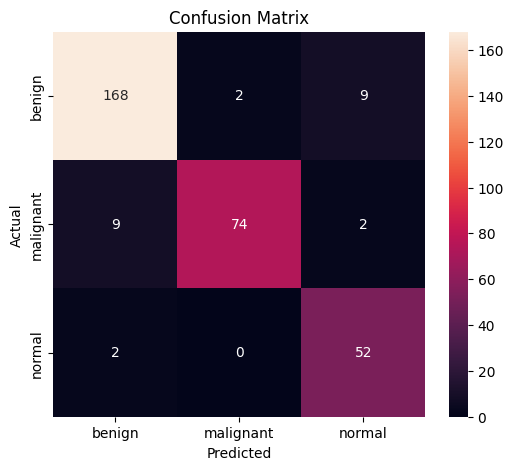

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# get all predictions and labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# classes you used
classes = ["benign","malignant","normal"]

# confusion matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install segmentation-models-pytorch -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
import segmentation_models_pytorch as smp

unet_model = smp.Unet(
    encoder_name="resnet18",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1,           # tumour mask = 1 class
)

unet_model = unet_model.to(device)

print("UNET model ready")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

UNET model ready


In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import glob

class BUSI_SEG_DATA(Dataset):

    def __init__(self, base):
        self.images = []

        subfolders = ["benign","malignant","normal"]
        for s in subfolders:
            files = glob.glob(f"{base}/{s}/*.png")
            for f in files:
                if "_mask" not in f:  # original image
                    self.images.append(f)

        self.transform_img = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
        ])

        self.transform_mask = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        mask_path = img_path.replace(".png", "_mask.png")

        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # grayscale mask

        return self.transform_img(img), self.transform_mask(mask)

In [ ]:
seg_dataset = BUSI_SEG_DATA("busi/Dataset_BUSI_with_GT")
seg_loader  = DataLoader(seg_dataset, batch_size=4, shuffle=True)

len(seg_dataset)

780

In [ ]:
dice_loss = smp.losses.DiceLoss(mode='binary')

optim_unet = torch.optim.Adam(unet_model.parameters(), lr=0.0001)

epochs = 5

for epoch in range(epochs):
    unet_model.train()
    total = 0
    for imgs, masks in seg_loader:
        imgs, masks = imgs.to(device), masks.to(device)

        optim_unet.zero_grad()
        pred = unet_model(imgs)

        loss = dice_loss(pred, masks)
        loss.backward()
        optim_unet.step()

        total += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Dice Loss: {total/len(seg_loader):.4f}")

print("Segmentation training done")

Epoch 1/5 - Dice Loss: 0.7087
Epoch 2/5 - Dice Loss: 0.4934
Epoch 3/5 - Dice Loss: 0.3532
Epoch 4/5 - Dice Loss: 0.2830
Epoch 5/5 - Dice Loss: 0.2487
Segmentation training done


In [ ]:
from torchvision.transforms.functional import to_pil_image
import numpy as np

def agent_predict(image_path):
    # load image
    img = Image.open(image_path).convert("RGB")
    img_t = transform(img).unsqueeze(0).to(device)

    # 1) segmentation
    unet_model.eval()
    with torch.no_grad():
        mask = unet_model(img_t)[0][0].cpu()
    mask = mask > 0.5

    # 2) extract ROI
    mask_np = (np.array(mask).astype(np.uint8)) * 255
    roi = Image.fromarray(mask_np).resize(img.size)
    roi = Image.composite(img, Image.new("RGB", img.size), roi)

    # 3) classification
    roi_t = transform(roi).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        out = model(roi_t)
        _, pred = torch.max(out, 1)

    classes = ["benign","malignant","normal"]
    return classes[pred.item()]

In [ ]:
!ls busi/Dataset_BUSI_with_GT/benign | head

benign (100)_mask_1.png
benign (100)_mask.png
benign (100).png
benign (101)_mask.png
benign (101).png
benign (102)_mask.png
benign (102).png
benign (103)_mask.png
benign (103).png
benign (104)_mask.png


In [ ]:
# ===================== GRADCAM FUNCTION =====================

import numpy as np
import cv2
import torch

def gradcam_on_classifier(model, roi_img_t, target_layer="layer4"):
    model.eval()

    fmap = None
    grad = None

    def fwd_hook(m, i, o):
        nonlocal fmap
        fmap = o

    def bwd_hook(m, gi, go):
        nonlocal grad
        grad = go[0]

    # get layer
    layer = dict([*model.named_modules()])[target_layer]
    fh = layer.register_forward_hook(fwd_hook)
    bh = layer.register_full_backward_hook(bwd_hook)

    # forward
    logits = model(roi_img_t)
    pred_class = logits.argmax(dim=1)

    # backward
    model.zero_grad()
    logits[0, pred_class].backward()

    # GAP over gradients
    weights = grad.mean(dim=(2,3), keepdim=True)    # (C,1,1)
    cam = (weights * fmap).sum(dim=1)[0].cpu().detach().numpy()

    fh.remove()
    bh.remove()

    cam = np.maximum(cam, 0)
    cam = cam / (cam.max() + 1e-8)

    return cam      # (H,W)

# ===================== VISUALISATION =====================

from matplotlib import pyplot as plt
import matplotlib.cm as cm

def plot_gradcam(orig_img, cam):
    # orig_img must be BGR (cv2)
    h,w = orig_img.shape[:2]
    cam_resized = cv2.resize(cam, (w,h))

    # apply colormap JET
    heatmap = cm.jet(cam_resized)[:,:,:3]       # (H,W,3) float 0-1
    heatmap = (heatmap * 255).astype(np.uint8)  # 0-255

    # overlay
    overlay = cv2.addWeighted(orig_img, 0.3, heatmap, 0.7, 0)

    # show
    plt.figure(figsize=(4,6))
    plt.title("3-Color GradCAM Heatmap")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [ ]:
from torchvision import transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

def _run_agent_on_pil(img_pil):
    """
    takes PIL.Image input, runs:
    1) U-Net tumor segmentation
    2) extract ROI using mask
    3) classify ROI -> benign / malignant / normal
    4) return classification + mask
    """

    # 1) Preprocess for UNet: use same transform used in training
    img_t = transform(img_pil).unsqueeze(0).to(device)   # 1xCxHxW

    # 2) segmentation inference (UNet)
    unet_model.eval()
    with torch.no_grad():
        mask_pred = unet_model(img_t)[0][0].cpu()

    mask_bin = (mask_pred > 0.5)

    # 3) convert mask to PIL to create ROI
    mask_np = mask_bin.numpy().astype(np.uint8)*255
    mask_img = Image.fromarray(mask_np).resize(img_pil.size)

    # ROI
    roi = Image.composite(img_pil, Image.new("RGB", img_pil.size), mask_img)

    # 4) classification
    roi_t = transform(roi).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        out = model(roi_t)
        _, pred = torch.max(out,1)

    classes = ["benign","malignant","normal"]
    return classes[pred.item()], mask_img

Saving normal (4).png to normal (4).png
Uploaded: normal (4).png

--- Agent prediction ---
Predicted class: benign
Predicted probability (class): 0.5442
All class probabilities: {'benign': 0.5442, 'malignant': 0.2812, 'normal': 0.1746}

NOTE: Research only. Not medical diagnosis.



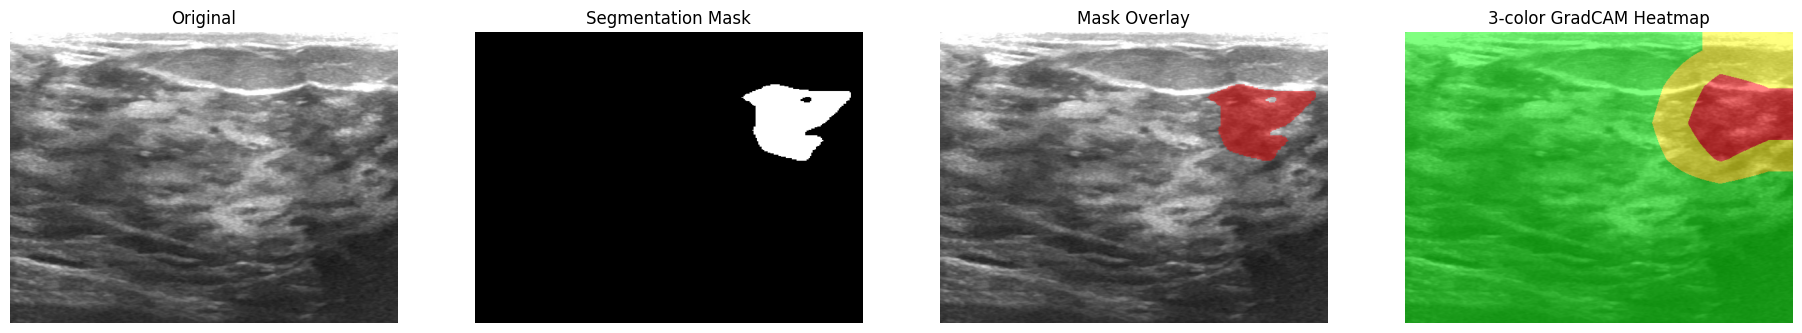

Saved to agent_outputs/

           MAMMOGRAPHY – DIAGNOSTIC REPORT          
Patient ID                : AUTO-normal (4)
Input Mammogram Filename  : normal (4).png
Modality                  : Digital Mammography (2D)
Models Used               : UNet (ROI) + CNN Classifier
Dataset Reference         : Kaggle Mammography Dataset
----------------------------------------------------
FINDINGS:

 • No aggressive morphological pattern detected.
 • benign probability score : 54.42 %

BI-RADS Category Estimate : 2
Conclusion : LIKELY BENIGN
----------------------------------------------------
RECOMMENDATIONS:

 • Routine mammographic follow-up recommended.
 • Annual clinical breast exam.



In [ ]:
# Colab cell: upload + agent inference + visual output
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import io
import os
import cv2

# ============================================================
# AGENT FUNCTION   (3 COLOR CAM)
# ============================================================
def _run_agent_on_pil(img_pil):
    img_t = transform(img_pil).unsqueeze(0).to(device)   # UNet input

    # segmentation
    unet_model.eval()
    with torch.no_grad():
        seg_logits = unet_model(img_t)
        seg_probs = torch.sigmoid(seg_logits)
    seg_mask = seg_probs[0,0].cpu().numpy()
    mask_bin = (seg_mask > 0.5).astype(np.uint8)*255
    mask_pil = Image.fromarray(mask_bin).convert("L")
    mask_resized = mask_pil.resize(img_pil.size, Image.NEAREST)

    # ROI
    roi = Image.composite(img_pil, Image.new("RGB", img_pil.size, (0,0,0)), mask_resized)

    # classification
    roi_t = transform(roi).unsqueeze(0).to(device)
    model.eval()
    model.zero_grad()
    logits = model(roi_t)
    probs = torch.softmax(logits, dim=1).detach().cpu().numpy()[0]
    pred_idx = int(np.argmax(probs))
    classes = ["benign","malignant","normal"]

    # mask overlay (red only)
    overlay = img_pil.copy().convert("RGBA")
    red_mask = Image.new("RGBA", img_pil.size, (255,0,0,120))
    alpha = mask_resized.point(lambda p: 120 if p>0 else 0)
    red_mask.putalpha(alpha)
    overlay = Image.alpha_composite(overlay.convert("RGBA"), red_mask)

    # ============================================================
    # GRAD CAM (3-color)
    # ============================================================
    cam = gradcam_on_classifier(model, roi_t)
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-7)
    cam = cv2.resize(cam, (img_pil.width, img_pil.height))

    heatmap = np.zeros((cam.shape[0], cam.shape[1], 3), dtype=np.uint8)

    high = cam > 0.66
    mid  = (cam <= 0.66) & (cam > 0.33)
    low  = cam <= 0.33

    heatmap[high] = [255,0,0]       # RED = tumour high attention
    heatmap[mid]  = [255,255,0]     # YELLOW = medium suspicious
    heatmap[low]  = [0,255,0]       # GREEN = normal

    overlay_cam = cv2.addWeighted(np.array(img_pil.convert("RGB")), 0.5, heatmap, 0.5, 0)
    overlay_cam = Image.fromarray(overlay_cam)

    return {
        "pred_class": classes[pred_idx],
        "pred_prob": float(probs[pred_idx]),
        "probs_all": [float(p) for p in probs],
        "mask_pil": mask_resized,
        "overlay_pil": overlay.convert("RGB"),
        "roi_pil": roi,
        "overlay_cam_pil": overlay_cam
    }


# ============================================================
# UPLOAD & RUN
# ============================================================
uploaded = files.upload()

if not uploaded:
    print("No file uploaded.")
else:
    fname = list(uploaded.keys())[0]
    print("Uploaded:", fname)

    img_bytes = uploaded[fname]
    img_pil = Image.open(io.BytesIO(img_bytes)).convert("RGB")

    results = _run_agent_on_pil(img_pil)

    print("\n--- Agent prediction ---")
    print("Predicted class:", results["pred_class"])
    print(f"Predicted probability (class): {results['pred_prob']:.4f}")
    print("All class probabilities:", {c: round(p,4) for c,p in zip(['benign','malignant','normal'], results['probs_all'])})
    print("\nNOTE: Research only. Not medical diagnosis.\n")

    fig, axs = plt.subplots(1,4, figsize=(23,6))
    axs[0].imshow(img_pil); axs[0].set_title("Original"); axs[0].axis('off')
    axs[1].imshow(results["mask_pil"], cmap='gray'); axs[1].set_title("Segmentation Mask"); axs[1].axis('off')
    axs[2].imshow(results["overlay_pil"]); axs[2].set_title("Mask Overlay"); axs[2].axis('off')
    axs[3].imshow(results["overlay_cam_pil"]); axs[3].set_title("3-color GradCAM Heatmap"); axs[3].axis('off')
    plt.show()

    os.makedirs("agent_outputs", exist_ok=True)
    base_out = os.path.join("agent_outputs", os.path.splitext(fname)[0])
    results["overlay_pil"].save(base_out + "_overlay.png")
    results["mask_pil"].save(base_out + "_mask.png")
    results["roi_pil"].save(base_out + "_roi.png")
    results["overlay_cam_pil"].save(base_out + "_heatmap_overlay.png")
    print("Saved to agent_outputs/")

    # =============================
    # ADD MEDICAL REPORT STYLE OUT
    # =============================
    print("\n====================================================")
    print("           MAMMOGRAPHY – DIAGNOSTIC REPORT          ")
    print("====================================================")
    print(f"Patient ID                : AUTO-{os.path.splitext(fname)[0]}")
    print(f"Input Mammogram Filename  : {fname}")
    print("Modality                  : Digital Mammography (2D)")
    print("Models Used               : UNet (ROI) + CNN Classifier")
    print("Dataset Reference         : Kaggle Mammography Dataset")
    print("----------------------------------------------------")
    print("FINDINGS:\n")

    pred = results["pred_class"]

    if pred == "malignant":
        print(" • Suspicious enhancing region detected within ROI.")
        print(f" • malignancy probability score : {results['pred_prob']*100:.2f} %")
        print("\nBI-RADS Category Estimate : 5")
        print("Conclusion : HIGH SUSPICION OF MALIGNANCY")
        print("----------------------------------------------------")
        print("RECOMMENDATIONS:\n")
        print(" • Recommend histopathology/biopsy correlation.")
        print(" • Suggest oncology specialist referral.")
        print(" • Consider further MRI evaluation if required.")
    elif pred == "benign":
        print(" • No aggressive morphological pattern detected.")
        print(f" • benign probability score : {results['pred_prob']*100:.2f} %")
        print("\nBI-RADS Category Estimate : 2")
        print("Conclusion : LIKELY BENIGN")
        print("----------------------------------------------------")
        print("RECOMMENDATIONS:\n")
        print(" • Routine mammographic follow-up recommended.")
        print(" • Annual clinical breast exam.")
    else:
        print(" • mammogram appears normal.")
        print(f" • probability score : {results['pred_prob']*100:.2f} %")
        print("\nBI-RADS Category Estimate : 1")
        print("Conclusion : NEGATIVE / NORMAL")
        print("----------------------------------------------------")
        print("RECOMMENDATIONS:\n")
        print(" • Routine annual screening only.")

    print("====================================================\n")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
from PIL import Image
import numpy as np

def run_app(image):
    if image is None:
        return None, None, None, None, "Upload a mammogram first"

    # ensure PIL
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)

    # run your own backend function
    results = _run_agent_on_pil(image)

    # convert pil images to numpy for gradio display
    orig_np = np.array(image)
    mask_np = np.array(results["mask_pil"])
    overlay_np = np.array(results["overlay_pil"])
    heat_np = np.array(results["overlay_cam_pil"])

    # build the FULL radiology style report text
    pred = results["pred_class"]
    probs = results["probs_all"]

    long_report = "====================================================\n"
    long_report += "           MAMMOGRAPHY – DIAGNOSTIC REPORT          \n"
    long_report += "====================================================\n"
    long_report += f"Prediction Class          : {pred.upper()}\n"
    long_report += f"Confidence Score          : {results['pred_prob']*100:.2f} %\n"
    long_report += "----------------------------------------------------\n"
    long_report += "Class Probabilities:\n"
    long_report += f" • Benign     : {probs[0]*100:.2f} %\n"
    long_report += f" • Malignant  : {probs[1]*100:.2f} %\n"
    long_report += f" • Normal     : {probs[2]*100:.2f} %\n"
    long_report += "----------------------------------------------------\n"
    long_report += "FINDINGS:\n\n"

    if pred == "malignant":
        long_report += " • Suspicious enhancing region detected in ROI.\n"
        long_report += "\nBI-RADS Category Estimate : 5\n"
        long_report += "Conclusion : HIGH SUSPICION OF MALIGNANCY\n"
        long_report += "----------------------------------------------------\n"
        long_report += "RECOMMENDATIONS:\n\n"
        long_report += " • Recommend histopathology/biopsy correlation.\n"
        long_report += " • Oncology specialist referral.\n"
        long_report += " • Consider MRI if required.\n"

    elif pred == "benign":
        long_report += " • No aggressive morphological pattern detected.\n"
        long_report += "\nBI-RADS Category Estimate : 2\n"
        long_report += "Conclusion : LIKELY BENIGN\n"
        long_report += "----------------------------------------------------\n"
        long_report += "RECOMMENDATIONS:\n\n"
        long_report += " • Routine mammographic follow-up recommended.\n"
        long_report += " • Annual clinical breast exam.\n"

    else:
        long_report += " • Mammogram appears normal.\n"
        long_report += "\nBI-RADS Category Estimate : 1\n"
        long_report += "Conclusion : NORMAL / NEGATIVE\n"
        long_report += "----------------------------------------------------\n"
        long_report += "RECOMMENDATIONS:\n\n"
        long_report += " • Routine annual screening.\n"

    long_report += "====================================================\n"

    return orig_np, mask_np, overlay_np, heat_np, long_report


In [ ]:
interface = gr.Interface(
    fn=run_app,
    inputs=gr.Image(type="pil", label="Upload Mammogram Image"),
    outputs=[
        gr.Image(label="Original"),
        gr.Image(label="Segmentation Mask"),
        gr.Image(label="Mask Overlay"),
        gr.Image(label="Attention Heatmap"),
        gr.Textbox(label="Radiology Style Report", lines=10)
    ],
    title="AI Breast Cancer Analysis",
    description="Upload mammogram image. AI will detect ROI + classify tumour probability.",
    allow_flagging="never",
    css="""
        .gradio-container {background-color:#fafafa}
        h1, h2 {text-align:center;}
    """
)

interface.launch(debug=True)

/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cb6f41f9164313aef8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
